In [1]:
from __future__ import print_function
__author__ ="fbb"
"""
PUI2016 class: demostration of variograms and correlations 
with NYC business time series
Written November 2015
Revised November 2016
"""

import pandas as pd
import json
import os
import pylab as pl
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/p2nb/lib/python2.7/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py2.7-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/envs/p2nb/lib/python2.7/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py2.7-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#functions that make variograms

from scipy.spatial.distance import pdist, squareform
# move imports to top cell! 
#I am leaving them here to show you when the relevant packages are about to be used

def SVh( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    bw max distance
    h distance
    P data
    '''
    pd = squareform( pdist( P[:,:2] ) )
    N = pd.shape[0]
    Z = list()
    for i in range(N):
        for j in range(i+1,N):
            if( pd[i,j] >= h-bw )and( pd[i,j] <= h+bw ):
                Z.append( ( P[i,2] - P[j,2] )**2.0 )
    return np.sum( Z ) / ( 2.0 * len( Z ) )
 
def SV( P, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( P, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T

In [3]:
#for ((y=93; y<=99; y+=1)); do wget \
#ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done
#for ((y=0; y<=9; y+=1)); do wget \
#ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done
#for ((y=10; y<=15; y+=1)); do wget \
#ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

In [6]:
import geopandas as gp

#http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/
#resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + 
    "/nyc-zip-code-tabulation-areas-polygons.geojson").\
    drop_duplicates(subset='postalCode')
print ("number of unique zip codes and of total zipcodes (should be equal)", 
       len(np.unique(nyczipsshp.postalCode)), 
       len(nyczipsshp.postalCode))
nyczips = nyczipsshp.postalCode.values.astype(int)
nyczipsshp

number of unique zip codes and of total zipcodes (should be equal) 247 247


,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.874400,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.913900,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.412340,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.057700,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.594300,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,42659399.898200,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...,11373
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9155180.262630,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11001
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,55587771.835000,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ...",11375
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,39568339.274800,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...,11427
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,25203458.868900,26323.994393,Queens,POLYGON ((-73.86451198956482 40.73407164841783...,11374


In [8]:
import glob
import zipfile

print (glob.glob(os.getenv("PUIDATA") + '/zb*zip'))
for f in glob.glob(os.getenv("PUIDATA") + '/zb*zip'):
    print (f)
    zf = zipfile.ZipFile(f)
    if 'ZIP' in pd.read_csv(zf.open(f.replace(os.getenv("PUIDATA") + "/", "").\
                                    replace('.zip','.txt'))).columns:
        print ('ZIP 1')
    else : print ('ZIP 0')
    if 'zip' in pd.read_csv(zf.open(f.replace(os.getenv("PUIDATA") + "/", "").\
                                    replace('.zip','.txt'))).columns:
        print ('zip 1')
    else : print ('zip 0')
    if 'EMP' in pd.read_csv(zf.open(f.replace(os.getenv("PUIDATA") + "/", "").\
                                    replace('.zip','.txt'))).columns:
        print ('EMP 1')
    else : print ('EMP 0')
    if 'emp' in pd.read_csv(zf.open(f.replace(os.getenv("PUIDATA") + "/", "").\
                                    replace('.zip','.txt'))).columns:
        print ('emp 1')
    else : print ('emp 0')


['/Users/fbianco/science/Dropbox//UI/PUIdata/zbp00totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp01totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp02totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp03totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp04totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp05totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp06totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp07totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp08totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp09totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp10totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp11totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp12totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp13totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp94totals.zip', '/Users/fbianco/science/Dropbox//UI/PUIdata/zbp95totals.zip', '/Users

In [9]:
#check type
print ("zipcode type:", type(nyczips[0]))

zipcode type: <type 'numpy.int64'>


In [10]:
#build timeline
cbs = np.zeros((len(nyczips), 2014 - 1994))
timeline = pd.date_range('1994', '2014', freq='A')


In [11]:
allfiles =  np.array(glob.glob(os.getenv("PUIDATA") + '/zb*zip'))
#print allfiles
for j,yy in enumerate(range(1994, 2014)):
    #print ("%d"%yy)[2:]
    #print ['94' in allf for allf in allfiles]
    f = allfiles[np.array([("%d"%yy)[2:] in allf for allf in allfiles])][0]
    zf = zipfile.ZipFile(f)
    df = pd.read_csv(zf.open(f.replace(os.getenv("PUIDATA") + "/","").\
                             replace('.zip','.txt')))
    if 'ZIP' in df.columns:
        z = 'ZIP'
        est = 'EST'
    else : 
        z = 'zip'
        est = 'est'
        
    
    for i,zp in enumerate(nyczips):
        try:
            #print i, j, (df[df[z]==zp][emp]).get_values()[0]
            cbs[i][j] = (df[df[z]==zp][est]).get_values()[0]
        except:
            cbs[i][j] = -1
        

In [12]:
print ("shape of time series set", cbs.shape)

shape of time series set (247, 20)


In [13]:
#remove bad zipcodeswith no time evolution (std = 0)
cleancsb = cbs[std(cbs, 1)>0]
cleannyczips = np.array(nyczips)[std(cbs, 1)>0]
badzips =  np.where(~(std(cbs, 1)>0))[0]
print ("removed zip codes", badzips)

removed zip codes [ 78 230 238]


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Text(0,0.5,u'mean number of businesses')

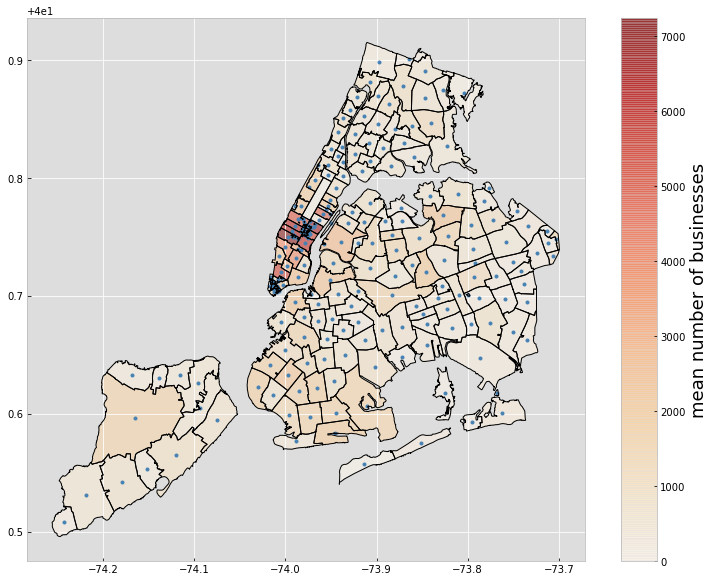

In [14]:
cleancsb[0]
# move imports to top cell! 
#I am leaving them here to show you when the relevant packages are about to be used

import pylab
%pylab inline


def getXY(pt):
    return (pt.x, pt.y)
centroidseries = nyczipsshp['geometry'].centroid
centroidlist = np.array(map(getXY, centroidseries))
X = delete(centroidlist, badzips, axis=0)
y = delete(np.array(nyczipsshp.postalCode).astype(int), badzips)
yy = np.array([cleancsb[zp][0].astype(int) for zp in range(len(y))])
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.plot(X[:,0],X[:,1], '.')#, ms=yy)

nyczipsshp['meanbusiness'] = cbs.mean(axis=1)
g_plot = nyczipsshp.plot(ax=ax, column='meanbusiness', cmap='OrRd', 
                          alpha=0.5)

vmin, vmax =  min(nyczipsshp.meanbusiness), max(nyczipsshp.meanbusiness)

# add colorbar
fig = ax.get_figure()
cax = fig.add_axes([0.95, 0.125, 0.05, 0.755])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=pl.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax, alpha=0.5)
cax.set_ylabel('mean number of businesses', rotation=90, fontsize=18)


In [16]:
from sklearn.cluster import KMeans
nc = 5

#tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

#I have to remove the time series that have NaN's because sklearn.cluster K-means 
#does not deal well with NaN's (or at all in fact)
#the next line does the trick: the std is NaN if there are NaN's in the time series
#tots = tots[tots.std(1)>0]

#I need to select the number of clusters. I arbitrarily choose 10
km = KMeans(n_clusters=nc, random_state=666)#, 
'''init=cleancsb[(cleannyczips == 10023) + 
                    (cleannyczips == 10260) +
                    (cleannyczips == 10041) +
                    (cleannyczips == 10011) +
                    (cleannyczips == 10001) ])
'''
##important! to perform K-means I have to "standardize" the data!
#we will talk about it more in class
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
print (vals.mean())

km.fit(vals)

7.37115286841e-18


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=666, tol=0.0001,
    verbose=0)

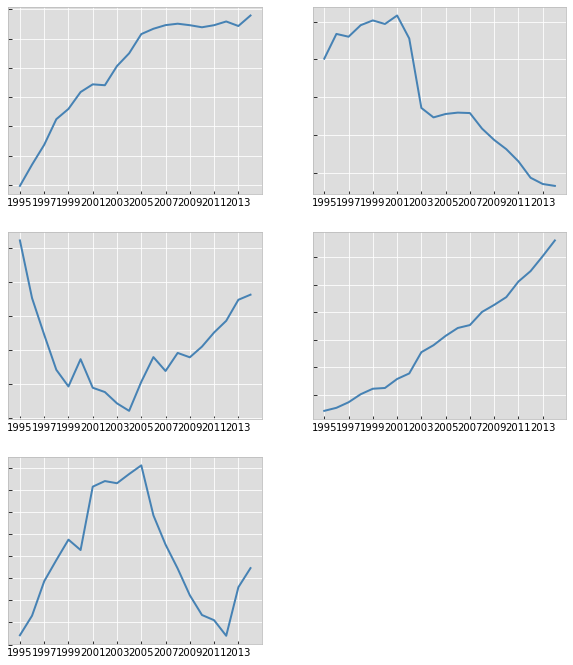

In [17]:
fig = pl.figure(figsize = (10,20))

for i,Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5,2,(i+1))
    ax.plot(timeline, Xc, lw=2)

    
    pl.xticks(fontsize = 10)
    ax.set_yticklabels([''*len(ax.get_xticklabels())])


In [18]:
print ("cluster centers")
print (km.cluster_centers_[2])
print (km.cluster_centers_[3])

cluster centers
[ 1.6122285   0.7630955   0.22318596 -0.29406587 -0.53921076 -0.13741929
 -0.55817983 -0.62151458 -0.78836855 -0.89835053 -0.4707552  -0.10668826
 -0.31153168 -0.0451542  -0.10953512  0.04777708  0.25597532  0.42780369
  0.73778194  0.81292588]
[-1.29781125 -1.24261078 -1.14123361 -0.9948846  -0.89467594 -0.88083605
 -0.71685595 -0.61556155 -0.22819107 -0.10088014  0.06987807  0.21345555
  0.2667004   0.50623992  0.63476092  0.77661497  1.06072437  1.25074975
  1.5240236   1.81039338]


In [21]:
print ("cluster members")
for j in range(5):
    print (j, cleannyczips[km.labels_==j])
    #(np.arange (1700)+10001)[km.labels_==j]
    #print sum((cleancsb - km.cluster_centers_[j])**2, axis=0)
    print ("\n\n\n\n")
    
    
    
clustersdf = gp.GeoDataFrame()
clustersdf['postalCode'] = cleannyczips
clustersdf['cluster'] = km.labels_

cluster members
0 [11374 11423 11432 11415 11433 11230 10466 10040 10473 10024 10025 11357
 11360 10128 11371 10023 10028 11102 10020 10001 10011 10014 10012 11412
 10005 11430 11239 11209 10304 10314 11096 11697 10309 10280 10055 10112
 10119 10278 10286 10282]





1 [10021 10017 10013 10006 10048 10165 10118 10176 10019 10111 10122 10107
 10103 10166 10169 10172 10152 10270 10110 10175 10151 10173 10178 10121
 10123 10106 10022 10096 10265 10047 10260 10285 10281]





2 [11426 10471 10470 11005 11236 10310 10168 10105 10153 10177 10154 10104
 10158 10120 10155 10196 10275 10203]





3 [11372 11004 11040 11365 11373 11001 11375 11427 11366 11428 11379 11429
 11435 11418 11221 11421 11419 11434 11216 11416 11233 11436 11213 11212
 11225 11218 11226 11219 11210 11204 10467 10463 10475 10469 10468 10458
 10034 10033 10462 10453 10465 10461 10457 10460 10032 10452 10456 10472
 10031 10039 10459 10451 10030 10027 10474 10455 10037 10454 10026 10035
 10029 11356 11359 11105 11354 11370 1

cluster 2 pearson R lag 1: 1.00
cluster 2 pearson R lag 3: 0.99
cluster 2 pearson R lag 5: 0.98

cluster 3 pearson R lag 1: 0.81
cluster 3 pearson R lag 3: 0.16
cluster 3 pearson R lag 5: -0.04

cluster 2 distance lag 1: 0.02
cluster 2 distance lag 3: 0.13
cluster 2 distance lag 5: 0.34

cluster 3 distance lag 1: 0.06
cluster 3 distance lag 3: 0.25
cluster 3 distance lag 5: 0.33


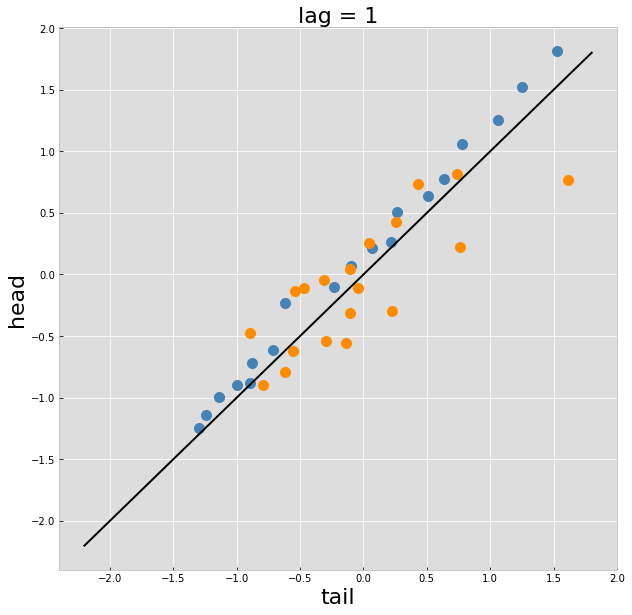

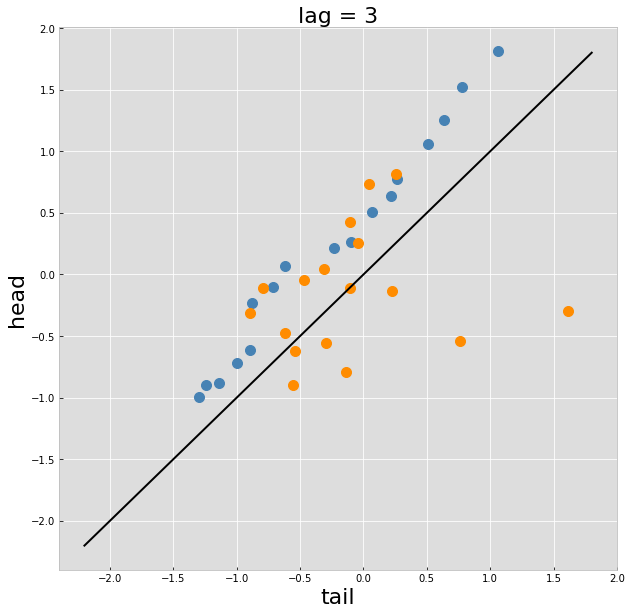

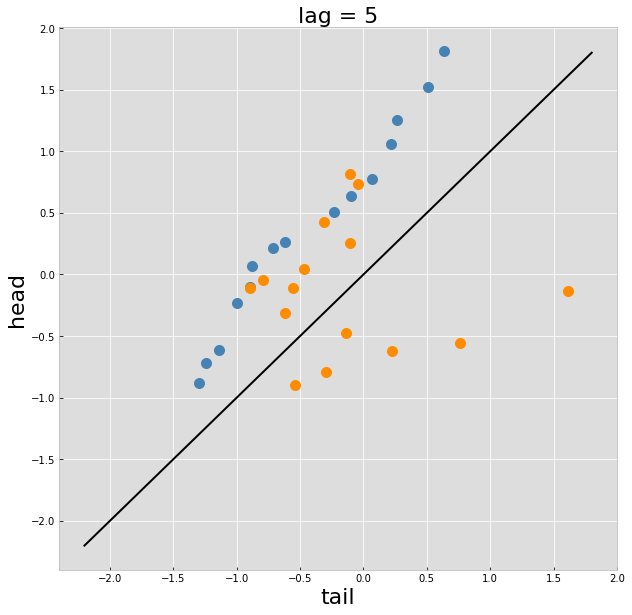

In [22]:
selected= (3, 2)
lags = (1, 3, 5)


#lag 1
pl.figure(figsize=(10, 10), dpi=200)
pl.plot(km.cluster_centers_[selected[0]][:-lags[0]], 
        km.cluster_centers_[selected[0]][lags[0]:], 'o', 
        color="SteelBlue", ms=10)
#pl.figure(figsize=(10,10), dpi=200)
pl.plot(km.cluster_centers_[selected[1]][:-lags[0]], 
        km.cluster_centers_[selected[1]][lags[0]:], 'o', 
        color="DarkOrange", ms=10)
pl.plot([-2.2,1.8], [-2.2,1.8] ,'k-')
pl.xlabel("tail", fontsize=22)
pl.ylabel("head", fontsize=22)
pl.title("lag = %d"%lags[0], fontsize=22)


#lag 3
pl.figure(figsize=(10, 10), dpi=200)
pl.plot(km.cluster_centers_[selected[0]][:-lags[1]], 
        km.cluster_centers_[selected[0]][lags[1]:], 'o', 
        color="SteelBlue", ms=10)
#pl.figure(figsize=(10,10), dpi=200)
pl.plot(km.cluster_centers_[selected[1]][:-lags[1]], 
        km.cluster_centers_[selected[1]][lags[1]:], 'o', 
        color="DarkOrange", ms=10)
pl.plot([-2.2,1.8], [-2.2,1.8] ,'k-')
pl.xlabel("tail", fontsize=22)
pl.ylabel("head", fontsize=22)
pl.title("lag = %d"%lags[1], fontsize=22)


#lag 5
pl.figure(figsize=(10, 10), dpi=200)
pl.plot(km.cluster_centers_[selected[0]][:-lags[2]], 
        km.cluster_centers_[selected[0]][lags[2]:], 'o', 
        color="SteelBlue", ms=10)
#pl.figure(figsize=(10,10), dpi=200)
pl.plot(km.cluster_centers_[selected[1]][:-lags[2]], 
        km.cluster_centers_[selected[1]][lags[2]:], 'o', 
        color="DarkOrange", ms=10)
pl.plot([-2.2,1.8], [-2.2,1.8] ,'k-')
pl.xlabel("tail", fontsize=22)
pl.ylabel("head", fontsize=22)
pl.title("lag = %d"%lags[2], fontsize=22)


import scipy
for i in lags:
    print ("cluster 2 pearson R lag {0:d}: {1:.2f}".format(i, 
           scipy.stats.pearsonr(km.cluster_centers_[selected[0]][:-i], 
                               km.cluster_centers_[selected[0]][i:])[0]))
print ("")

for i in lags:
    print ("cluster 3 pearson R lag {0:d}: {1:.2f}".format(i, 
           scipy.stats.pearsonr(km.cluster_centers_[selected[1]][:-i], 
                             km.cluster_centers_[selected[1]][i:])[0]))
print ("")
    
N = len(km.cluster_centers_[0]) * 1.0
for i in lags:
    print ("cluster 2 distance lag {0:d}: {1:.2f}".format(i, 
                np.sum((km.cluster_centers_[selected[0]][i:] - 
                  km.cluster_centers_[selected[0]][:-i])**2) / (N-i) * 0.5))
print ("")
    
for i in lags:
    print ("cluster 3 distance lag {0:d}: {1:.2f}".format(i,  
           np.sum((km.cluster_centers_[selected[1]][i:] - 
                  km.cluster_centers_[selected[1]][:-i])**2) / (N-i) * 0.5))